<font color=red><h1 style="text-align:center;font-size:30px;" >Quora Question Pair Similarity Problem</h1></font>

**<font color=green>Description</font>**

<p>Quora is a place to gain and share knowledge - about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> **Credits: Kaggle **

**<font color=green>Business Problem, Problem Statement, Business Objectives and Constraints</font>**

- **Refer:** https://akashbangalkar.github.io/cs/

**<font color=green>Reference/Sources/Useful Links</font>**

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

In [1]:
#required_libraries_data_analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**<font color=blue><h3>Reading Data and Basic Stats</h3></font>**

In [3]:
data = pd.read_csv("D:/Applied_Ai/Case Studies/Quora/My Work/quora.csv", nrows=50000) #taking_random_50_k_rows_only

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     50000 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.3+ MB


In [6]:
print("NUMBER OF DATA POINTS -",data.shape[0])
print("NUMBER OF FEATURES -",data.shape[1])
print("FEATURES -",data.columns.values)

NUMBER OF DATA POINTS - 50000
NUMBER OF FEATURES - 6
FEATURES - ['id' 'qid1' 'qid2' 'question1' 'question2' 'is_duplicate']


In [7]:
data.head(4)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0


- **id:** Looks like a simple row ID
- **qid1 and qid2:** The unique ID of each question in the pair
- **question1 and question2:** The actual textual contents of the questions
- **is_duplicate:** The label that we are trying to predict; whether the two questions are duplicates of each other.

**<font color=blue><h3>Distribution of Data Points Among Output Classes</h3></font>**

NUMBER OF DUPLICATE (SIMILAR) AND NON-DUPLICATE (NON-SIMILAR) QUESTIONS


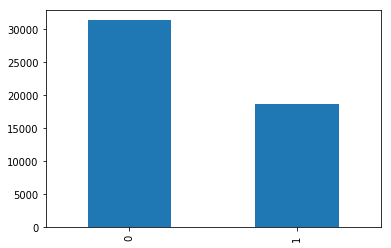

In [8]:
print("NUMBER OF DUPLICATE (SIMILAR) AND NON-DUPLICATE (NON-SIMILAR) QUESTIONS")

data['is_duplicate'].value_counts().plot.bar()

In [9]:
print("TOTAL NUMBER OF QUESTION PAIRS - ",len(data))

not_similar = len(data[data['is_duplicate']==0])
not_simi_per = round((not_similar/len(data))*100, 2)
print("QUESTION PAIRS ARE NOT SIMILAR (is_duplicate=0) - {} ({}%)".format(not_similar, not_simi_per))

similar = len(data[data['is_duplicate']==1])
simi_per = round((similar/len(data))*100, 2)
print("QUESTION PAIRS ARE SIMILAR (is_duplicate=1) - {} ({}%)".format(similar, simi_per))

TOTAL NUMBER OF QUESTION PAIRS -  50000
QUESTION PAIRS ARE NOT SIMILAR (is_duplicate=0) - 31351 (62.7%)
QUESTION PAIRS ARE SIMILAR (is_duplicate=1) - 18649 (37.3%)


**<font color=blue><h3>Number of Unique Questions</h3></font>**

In [10]:
qids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist()) #one_dimensional_ndarray
unique_qs = len(np.unique(qids)) #number_of_unique_ques
print("TOTAL NUMBER OF UNIQUE QUESTIONS -", unique_qs)

qs_more_than_1_time = np.sum(qids.value_counts() > 1) #number_of_questions_occurs_more_than_one_time
per_more_than_1 = round(((qs_more_than_1_time)/unique_qs)*100, 2)
print("NUMBER OF UNIQUE QUESTIONS THAT APPEAR MORE THAN ONE TIME - {} ({}%)".format(qs_more_than_1_time, per_more_than_1))

print("MAX NUMBER OF TIMES SINGLE QUESTION REPEATED - ", max(qids.value_counts()))

TOTAL NUMBER OF UNIQUE QUESTIONS - 88911
NUMBER OF UNIQUE QUESTIONS THAT APPEAR MORE THAN ONE TIME - 7396 (8.32%)
MAX NUMBER OF TIMES SINGLE QUESTION REPEATED -  15


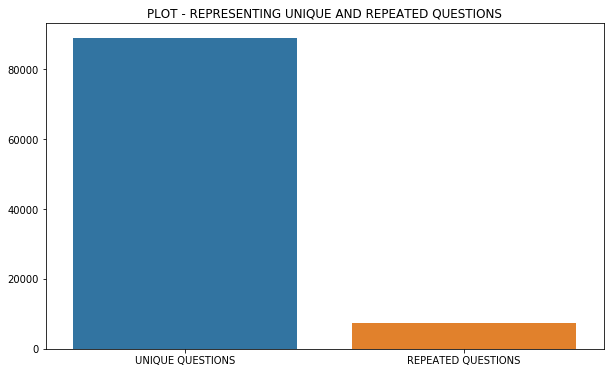

In [11]:
x = ["UNIQUE QUESTIONS", "REPEATED QUESTIONS"]
y = [unique_qs, qs_more_than_1_time]

plt.figure(figsize=(10,6))
plt.title("PLOT - REPRESENTING UNIQUE AND REPEATED QUESTIONS")
sns.barplot(x, y)
plt.show()

**<font color=blue><h3>Checking for Duplicates</h3></font>**

In [12]:
pair_duplicates = data[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print("NUMBER OF DUPLICATE QUESTIONS - ",pair_duplicates.shape[0] - data.shape[0])

NUMBER OF DUPLICATE QUESTIONS -  0


**<font color=blue><h3>Number of Occurrences of Each Question</h3></font>**

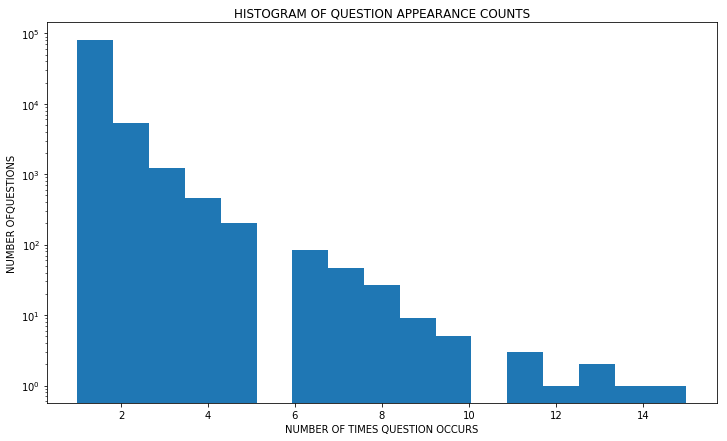

In [14]:
plt.figure(figsize=(12,7))
plt.hist(qids.value_counts(), bins=17)
plt.yscale("log", nonposy="clip")
plt.title("HISTOGRAM OF QUESTION APPEARANCE COUNTS")
plt.xlabel("NUMBER OF TIMES QUESTION OCCURS")
plt.ylabel("NUMBER OFQUESTIONS")
plt.show()

**<font color=blue><h3>Checking Null Values</h3></font>**

In [15]:
nan_rows = data[data.isnull().any(1)]
print("NULL VALUES -",nan_rows)

NULL VALUES - Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


**<font color=blue><h3>Basic Feature Extraction (Before Cleaning)</h3></font>**

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [16]:
data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count') #num_of_occurance_of_qid1
data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count') #num_of_occurance_of_qid2

data['q1len'] = data['question1'].str.len() #length_of_ques1_(_letters_)
data['q2len'] = data['question2'].str.len() #length_of_ques2_(_letters_)

#number_of_words_in_ques1_and_ques2
data['q1_n_words'] = data['question1'].apply(lambda row: len(row.split(" ")))
data['q2_n_words'] = data['question2'].apply(lambda row: len(row.split(" ")))

#number_of_common_unique_words_in_ques1_and_ques2
def word_Common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)
data['word_Common'] = data.apply(word_Common, axis=1)

#total_words_in_ques1_and_ques2
def word_Total(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))
data['word_Total'] = data.apply(word_Total, axis=1)

def word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
data['word_share'] = data.apply(word_share, axis=1)

#sum_total_of_frequency_of_qid1_and_qid2
data['freq_q1+q2'] = data['freq_qid1'] + data['freq_qid2']

#absolute_difference_of_frequency_of_qid1_and_qid2
data['freq_q1-q2'] = abs(data['freq_qid1'] - data['freq_qid2'])

In [27]:
#save_data_in_csv_file
data.to_csv("data_without_prepro.csv", index=False)

In [17]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0


**<font color=blue><h3>Analysis - Some of Extracted Features</h3></font>**

Let’s visualize some of the features and see how they look.

In [19]:
#there_are_some_questions_have_only_one_single_words_

print("MINIMUM LENGTH OF ANY QUESTION IN QUES_1 - ",min(data['q1len']))
print("MINIMUM LENGTH OF ANY QUESTION IN QUES_2 - ",min(data['q2len']))
print("*"*50)
print("NUMBER OF QUESTIONS WITH MINIMUM LENGTH IN QUES_1 - ",data[data['q1len']==1].shape[0])
print("NUMBER OF QUESTIONS WITH MINIMUM LENGTH IN QUES_2 - ",data[data['q2len']==1].shape[0])

MINIMUM LENGTH OF ANY QUESTION IN QUES_1 -  1
MINIMUM LENGTH OF ANY QUESTION IN QUES_2 -  1
**************************************************
NUMBER OF QUESTIONS WITH MINIMUM LENGTH IN QUES_1 -  3
NUMBER OF QUESTIONS WITH MINIMUM LENGTH IN QUES_2 -  1


<font color=blue>**Analysis Feature:** word_Total</font>

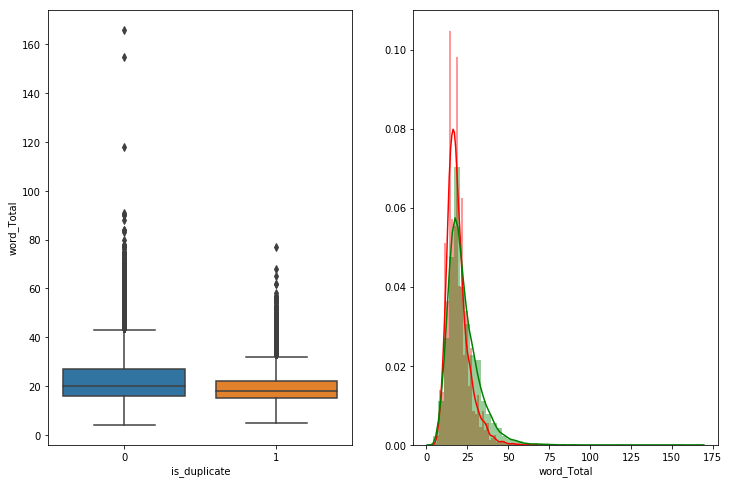

In [20]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'word_Total', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate']==1.0]['word_Total'][0:], label = "1", color="red")
sns.distplot(data[data['is_duplicate']==0.0]['word_Total'][0:], label = "0", color="green")

plt.show()

The above graph shows the separation of classes done using the **word_Total** feature. It actually not seems good, because there is not clear separation between both classes. A class label of 0 indicates that the questions are not duplicate and a class label of 1 indicates that the questions are duplicate. This is not a good feature, let’s try another feature.

<font color=blue>**Analysis Feature:** word_share</font>

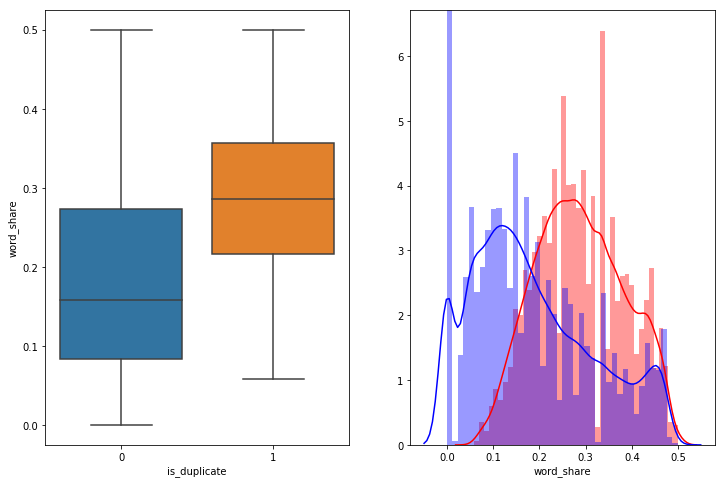

In [21]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'word_share', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate']==1.0]['word_share'][0:], label = "1", color="red")
sns.distplot(data[data['is_duplicate']==0.0]['word_share'][0:], label = "0", color="blue")

plt.show()

The above graph shows the separation of classes done using the **word_share** feature. It seems quite good, because there is  clear separation between both classes. From the box plot, we can clearly see higher values for duplicate questions. This would be an example of a good feature.

<font color=blue>**Analysis Feature:** q1len</font>

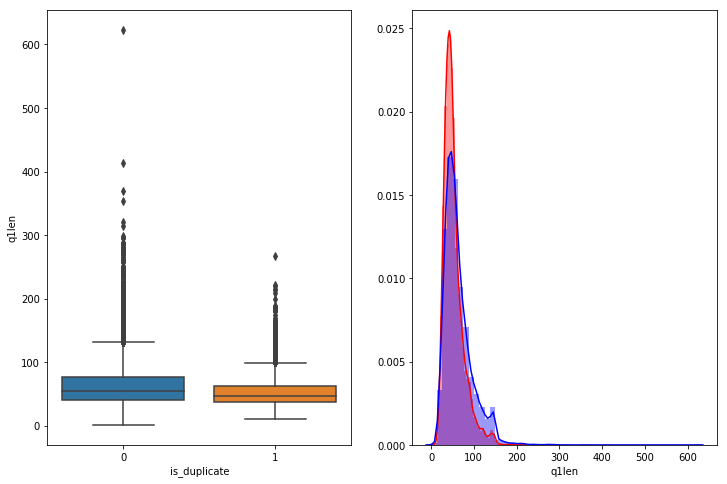

In [22]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'q1len', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate']==1.0]['q1len'][0:], label = "1", color="red")
sns.distplot(data[data['is_duplicate']==0.0]['q1len'][0:], label = "0", color="blue")

plt.show()

Similarly, **q1_len** does not provide much information. The graph for the **q1_len** feature; there is some difference, it clearly is not as good as the **word_share**. This would be an example of a meh feature.

<font color=blue>**Analysis Features:** Pair Plot of Features - [q2len, q1_n_words, q2_n_words, freq_q1+q2]</font>

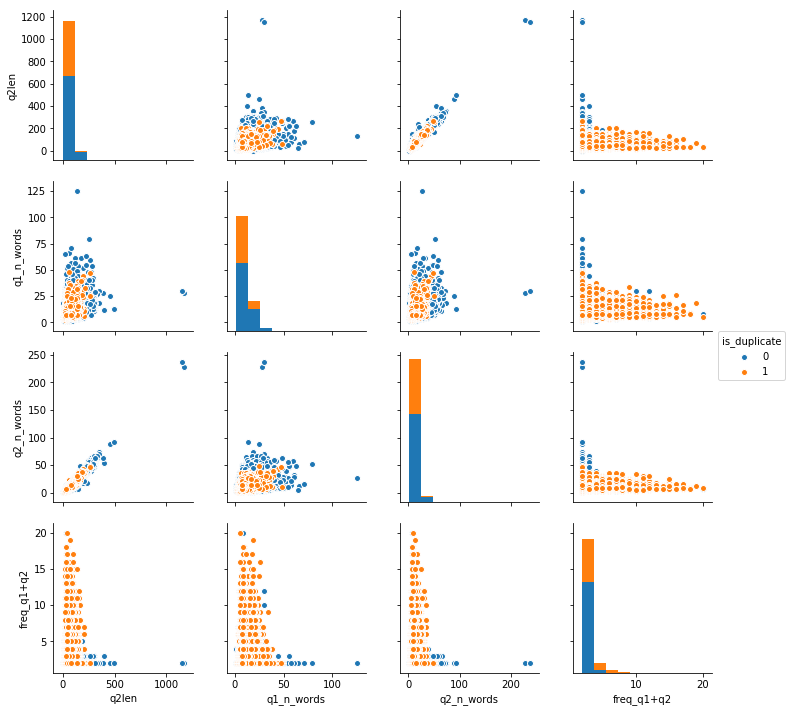

In [26]:
n = data.shape[0]
sns.pairplot(data[['q2len', 'q1_n_words', 'q2_n_words', 'freq_q1+q2', 'is_duplicate']][0:n], hue='is_duplicate', vars=['q2len', 'q1_n_words', 'q2_n_words', 'freq_q1+q2'])
plt.show()